<a href="https://colab.research.google.com/github/bunnycruz/Regulatory-Affairs-of-Road-Accident-Data-2020-India/blob/main/Daily_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Daily Transactions Analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Daily Household Transactions.csv')
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [6]:
print(df.shape)
df.info()

(2461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [7]:
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


- The dataset has 2461 rows and 8 columns, with missing values in Subcategory (635) and Note (521).
- All transactions are in INR

#Data Cleaning

In [8]:
df['Subcategory'] = df['Subcategory'].fillna('Unknown')
df['Note'] = df['Note'].fillna('No Note')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = df['Amount'].astype(float)

df.drop_duplicates(inplace=True)

print(df.dtypes)
print("Number of duplicates:", df.duplicated().sum())

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object
Number of duplicates: 0


/tmp/ipython-input-8-2848910209.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


- Summary statistics

In [9]:
print(df.describe())

                                Date         Amount
count                           1303    2057.000000
mean   2017-05-12 20:41:38.546431232    2791.281176
min              2015-01-13 18:52:47       2.000000
25%       2016-12-18 20:18:45.500000      30.000000
50%              2017-07-27 20:05:23      80.000000
75%       2018-01-30 12:09:30.500000     330.000000
max              2018-09-20 12:04:08  250000.000000
std                              NaN   13598.659347


#Exploratory Data Analysis (EDA)

- Distribution of transaction amounts

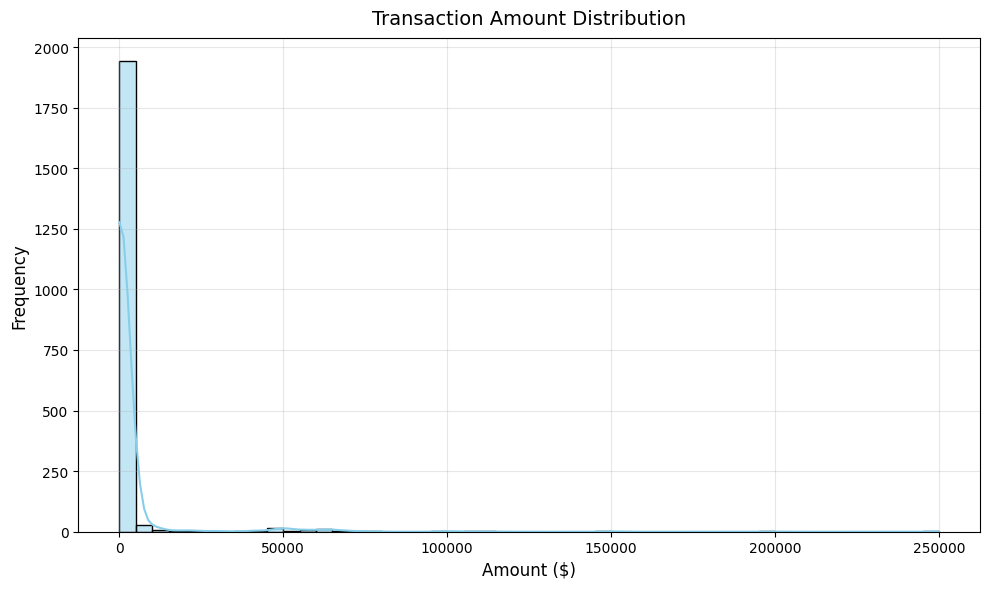

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Transaction Amount Distribution', fontsize=14, pad=10)
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- Transaction counts by category (top 5)

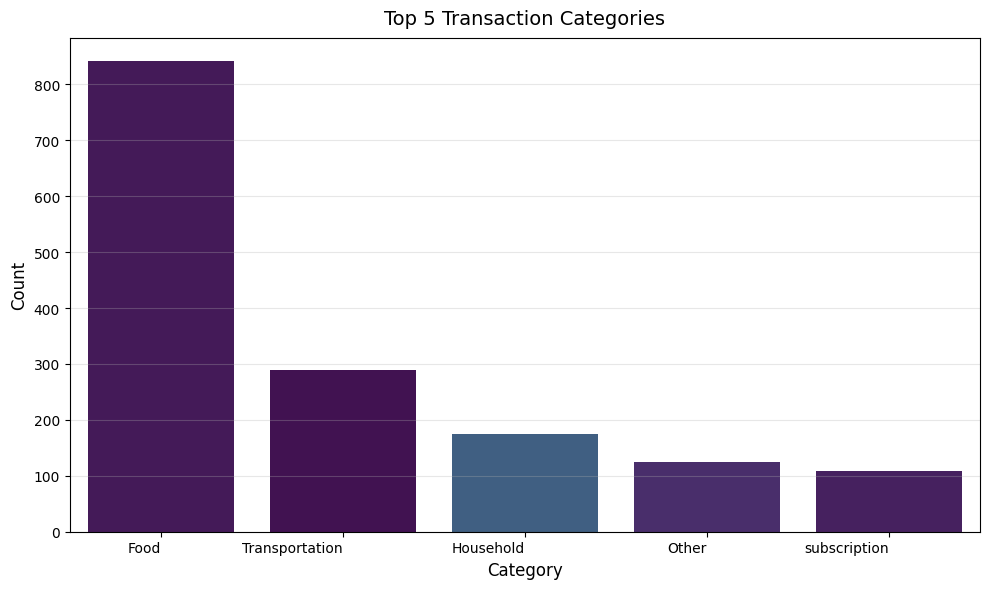

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().head(5).index, hue='Category', palette='viridis', legend=False)
plt.title('Top 5 Transaction Categories', fontsize=14, pad=10)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Transaction counts by mode (top 3)

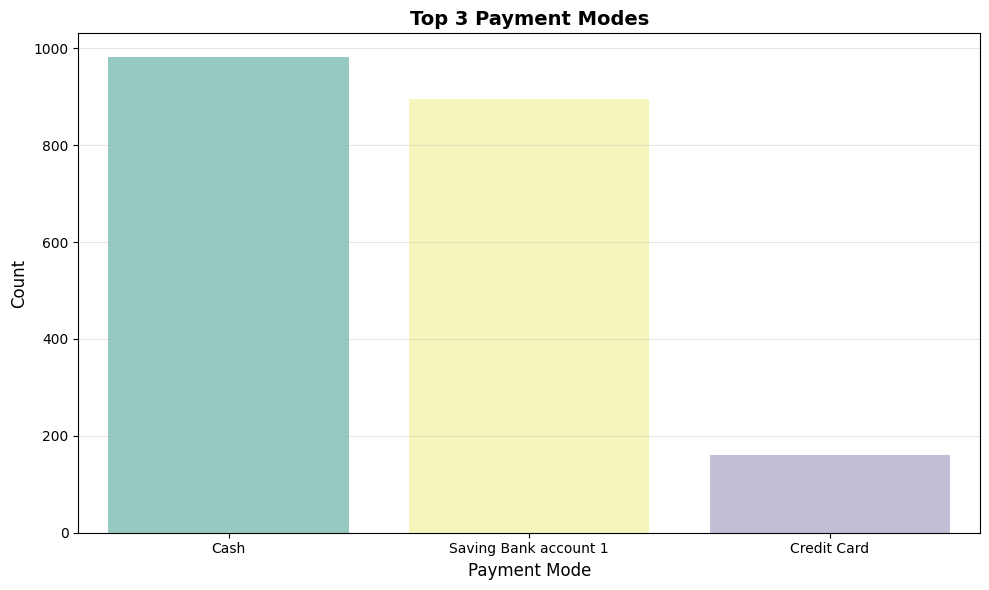

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mode', order=df['Mode'].value_counts().head(3).index,
              hue='Mode', palette='Set3', legend=False)
plt.title('Top 3 Payment Modes', fontsize=14, weight='bold')
plt.xlabel('Payment Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Transaction counts by subcategory (top 10)

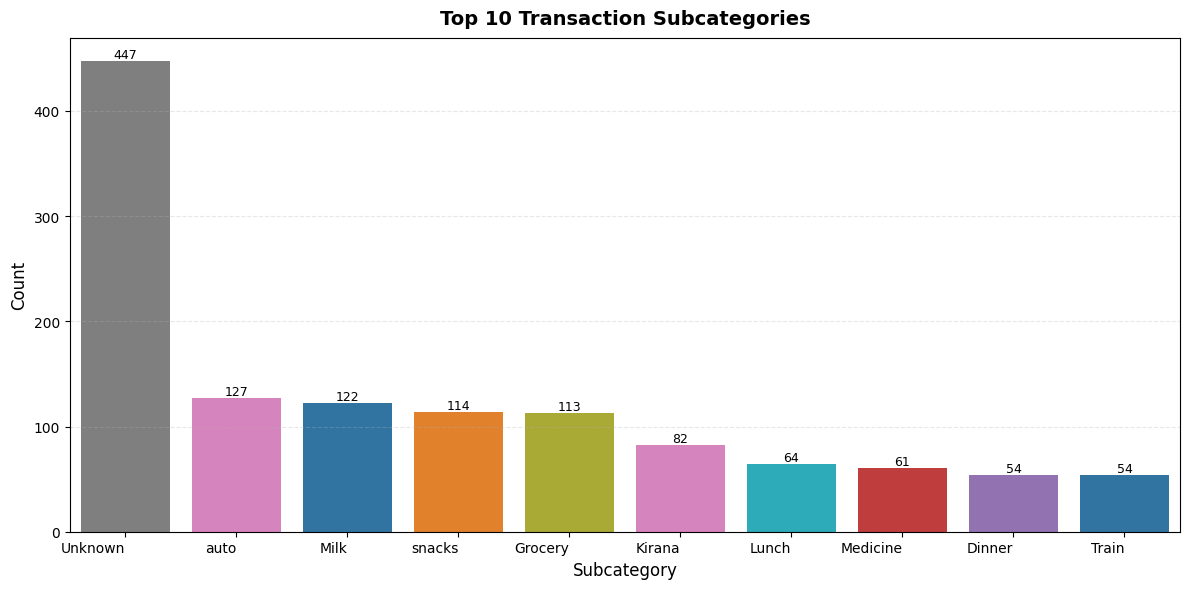

In [13]:
plt.figure(figsize=(12, 6))
top_subcats = df['Subcategory'].value_counts().head(10)
sns.countplot(data=df, x='Subcategory', order=top_subcats.index,
              hue='Subcategory', palette='tab10', legend=False)
plt.title('Top 10 Transaction Subcategories', fontsize=14, weight='bold', pad=10)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

- Transaction counts by Income/Expense

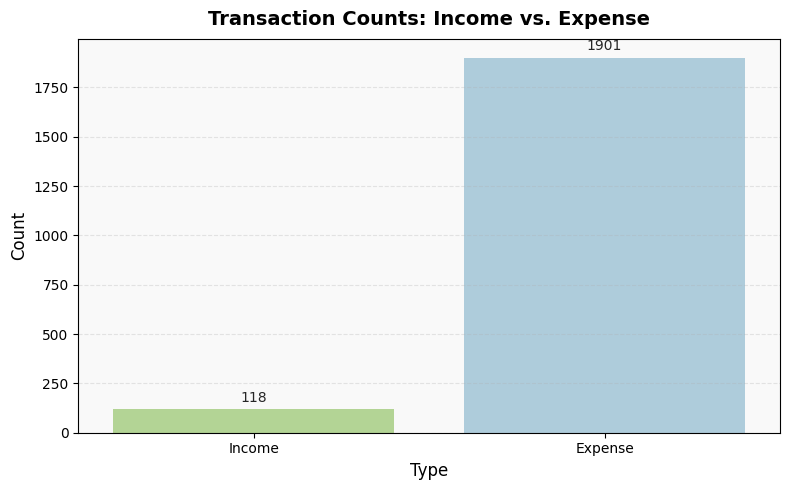

In [21]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Income/Expense', hue='Income/Expense',
                   palette='Paired', order=['Income', 'Expense'], legend=False)
plt.title('Transaction Counts: Income vs. Expense', fontsize=14, weight='bold', pad=10)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
sns.set_style("whitegrid", {"axes.grid": False})
plt.gca().set_facecolor('#f9f9f9')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.savefig('income_expense_counts.png', dpi=300, bbox_inches='tight')
plt.show()

- Boxplot of Amount by Category (top 5)

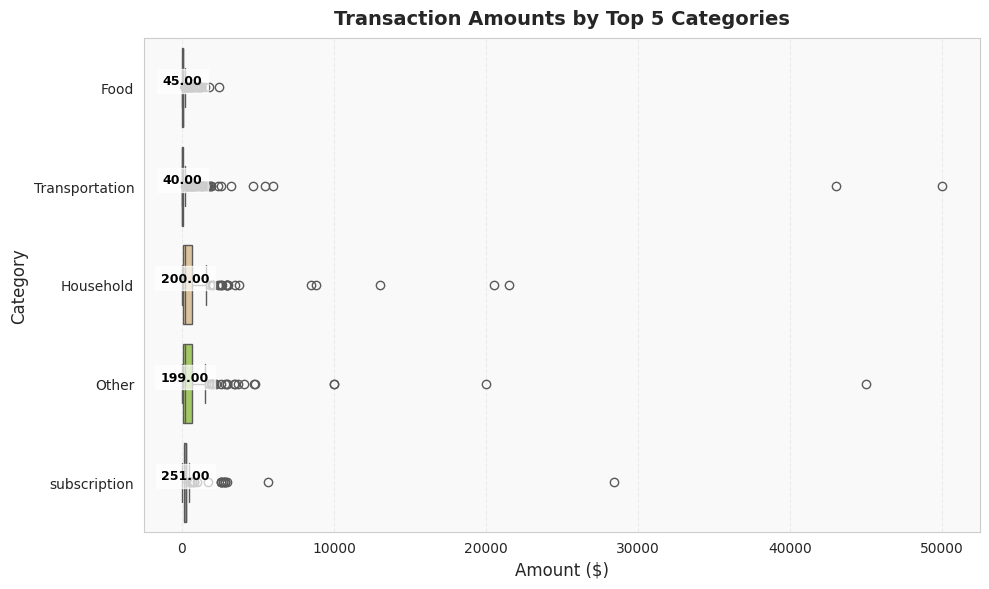

In [22]:

plt.figure(figsize=(10, 6))
top_cats = df['Category'].value_counts().nlargest(5).index
ax = sns.boxplot(data=df, x='Amount', y='Category', order=top_cats,
                 palette='Set2', hue='Category', legend=False)
plt.title('Transaction Amounts by Top 5 Categories', fontsize=14, weight='bold', pad=10)
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(True, axis='x', alpha=0.3, linestyle='--')
sns.set_style("whitegrid", {"axes.grid": False})
plt.gca().set_facecolor('#f9f9f9')

for i, cat in enumerate(top_cats):
    median = df[df['Category'] == cat]['Amount'].median()
    if not np.isnan(median):
        ax.text(median, i, f'{median:.2f}', ha='center', va='bottom', fontsize=9,
                color='black', weight='bold', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.savefig('amount_by_category_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


- Boxplot of Amount by Income/Expense

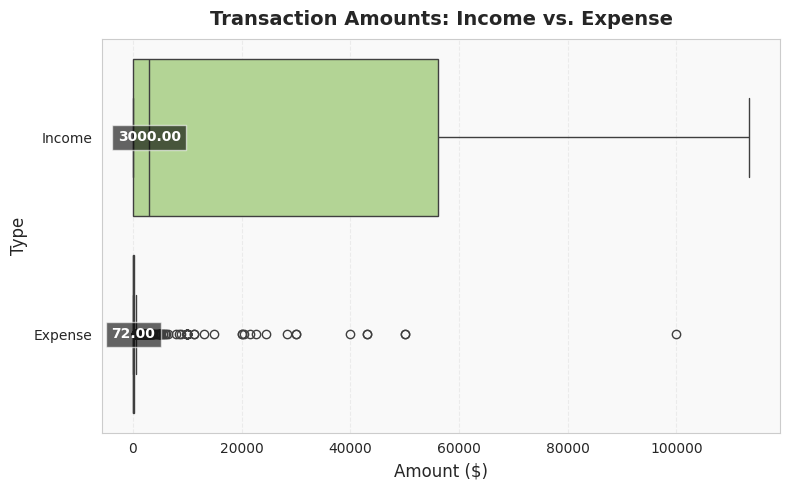

In [25]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='Amount', y='Income/Expense',
                 order=['Income', 'Expense'], palette='Paired',
                 hue='Income/Expense', legend=False)
plt.title('Transaction Amounts: Income vs. Expense', fontsize=14, weight='bold', pad=10)
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Type', fontsize=12)
plt.grid(True, axis='x', alpha=0.3, linestyle='--')
sns.set_style("whitegrid", {"axes.grid": False})
plt.gca().set_facecolor('#f9f9f9')

for i, category in enumerate(['Income', 'Expense']):
    median = df[df['Income/Expense'] == category]['Amount'].median()
    if not np.isnan(median):
        ax.text(median, i, f'{median:.2f}', ha='center', va='center', fontsize=10,
                color='white', weight='bold', bbox=dict(facecolor='black', alpha=0.6))

plt.tight_layout()
plt.savefig('amount_by_income_expense_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

- Scatterplot of Income/Expense vs Mode

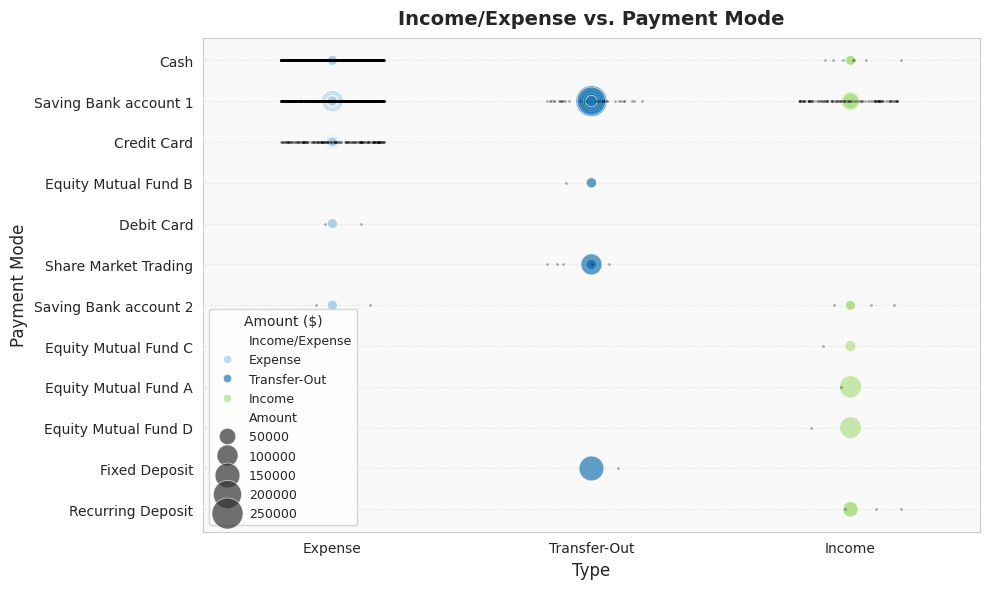

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Income/Expense', y='Mode', hue='Income/Expense',
                     palette='Paired', size='Amount', sizes=(50, 500), alpha=0.7)
plt.title('Income/Expense vs. Payment Mode', fontsize=14, weight='bold', pad=10)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Payment Mode', fontsize=12)
plt.grid(True, axis='both', alpha=0.3, linestyle='--')
sns.set_style("whitegrid", {"axes.grid": False})
plt.gca().set_facecolor('#f9f9f9')

sns.stripplot(data=df, x='Income/Expense', y='Mode', color='black', size=2, alpha=0.3, jitter=0.2)

plt.legend(title='Amount ($)', loc='best', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.savefig('income_expense_vs_mode_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

- Transaction amounts are right-skewed, with most being small.
- Food and Transportation dominate categories.
- Expenses likely outnumber income (verify with Income/Expense plot).

#Time Series Analysis

Objective: Analyze transaction trends over time.

/tmp/ipython-input-29-681475333.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum(numeric_only=True)


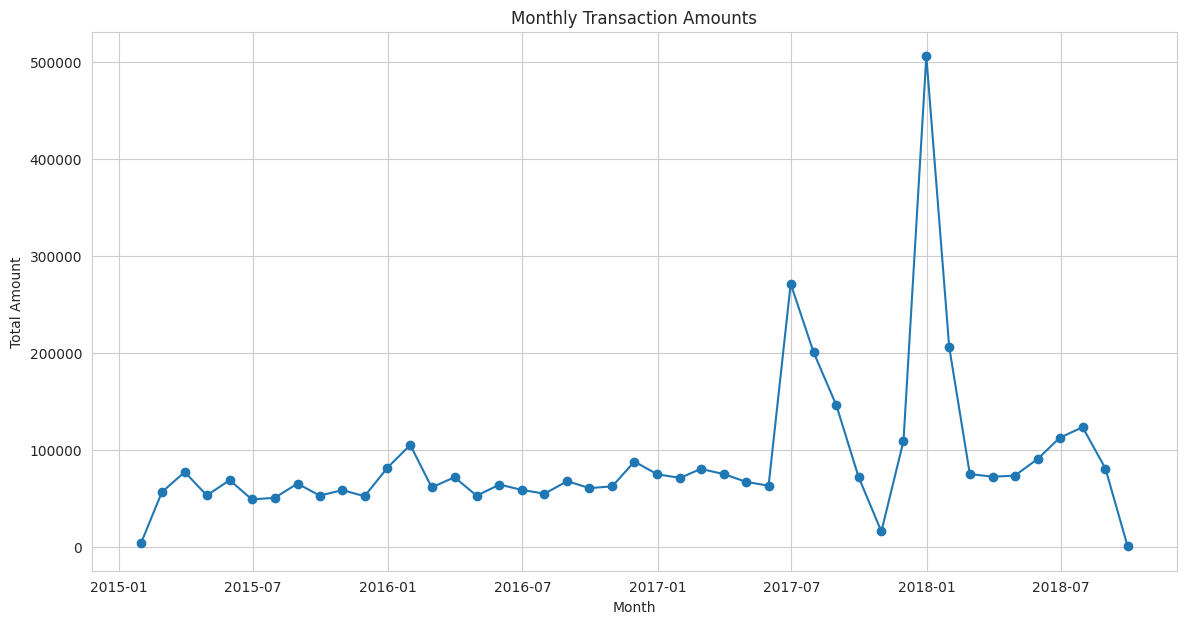

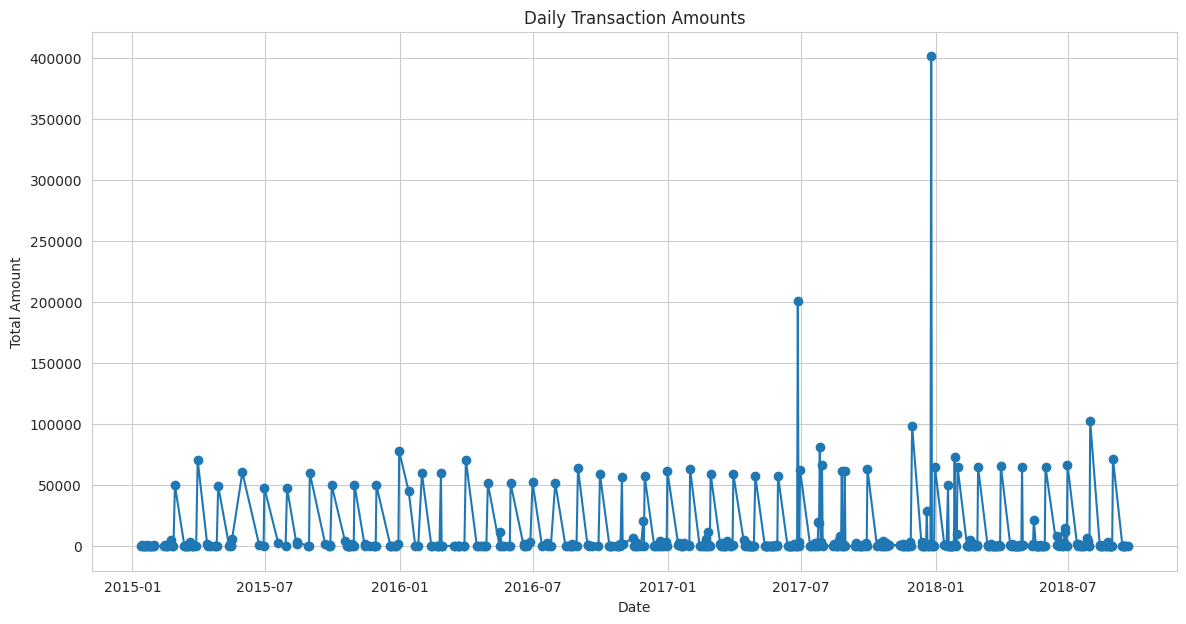

In [29]:
df.set_index('Date', inplace=True)

monthly_data = df.resample('M').sum(numeric_only=True)
plt.figure(figsize=(14,7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

df.reset_index(inplace=True)
daily_data = df.groupby(df['Date'].dt.date).sum(numeric_only=True)
plt.figure(figsize=(14,7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

-
Monthly trends show seasonal patterns; daily trends highlight variability.

#Correlation Analysis

Objective: Analyze correlations between transaction categories and amounts.

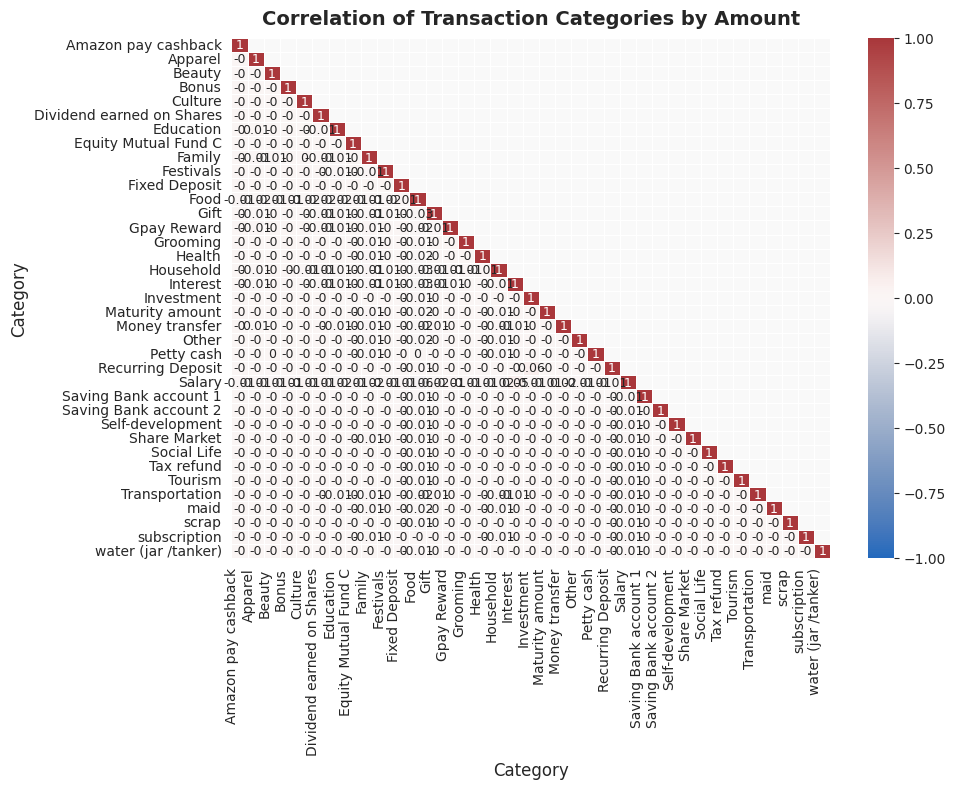

In [32]:
pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
                            aggfunc='sum', fill_value=0, observed=True)

correlation_matrix = pivot_table.corr(method='pearson').round(2)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', linewidths=0.5,
            mask=mask, annot_kws={'fontsize': 9}, vmin=-1, vmax=1, center=0)
plt.title('Correlation of Transaction Categories by Amount', fontsize=14, weight='bold', pad=10)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.set_style("whitegrid", {"axes.grid": False})
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.savefig('category_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

- Strong relationships between certain categories (e.g., Food and Household may correlate due to household spending patterns).

In [34]:
print(df.groupby('Category')['Amount'].mean().sort_values(ascending=False))

Category
Fixed Deposit                225000.000000
Equity Mutual Fund B         100000.000000
Salary                        58757.591860
Maturity amount               54684.571429
Saving Bank account 1         36399.795714
Share Market                  34520.125000
Equity Mutual Fund E          25500.000000
Equity Mutual Fund F          25500.000000
Equity Mutual Fund A          25500.000000
Money transfer                20089.935294
Public Provident Fund         17083.333333
Tax refund                    13065.000000
Tourism                       12721.770000
Life Insurance                11164.500000
Equity Mutual Fund D          10000.000000
Investment                     5898.000000
Small cap fund 1               5000.000000
Small Cap fund 2               5000.000000
Rent                           2625.333333
Cook                           2481.000000
Petty cash                     2195.000000
Gift                           1338.933333
Other                          1293.687742
Se

In [35]:
print(df.groupby('Income/Expense')['Amount'].sum())

Income/Expense
Expense         1356344.13
Income          3042355.35
Transfer-Out    1342965.90
Name: Amount, dtype: float64


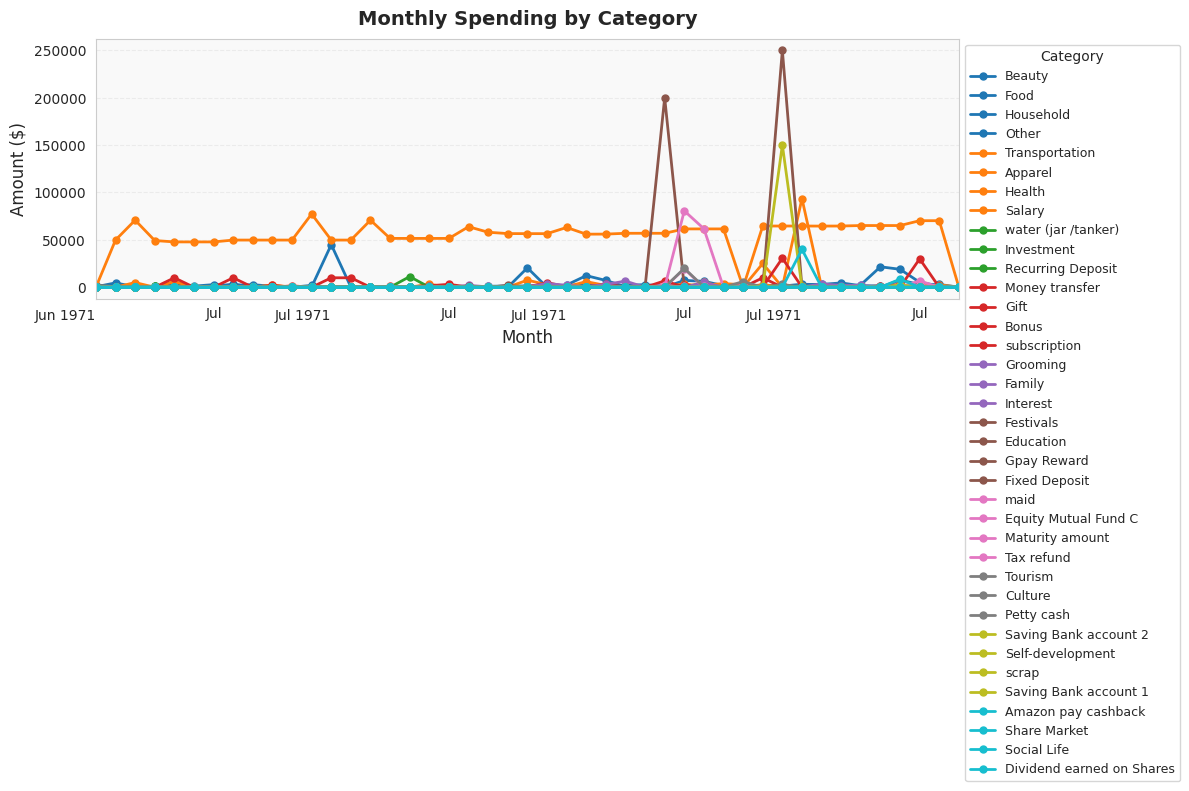

In [38]:
monthly_category = df.groupby([pd.Grouper(key='Date', freq='ME'), 'Category'])['Amount'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
monthly_category.plot(kind='line', ax=plt.gca(), colormap='tab10', linewidth=2, marker='o', markersize=5)
plt.title('Monthly Spending by Category', fontsize=14, weight='bold', pad=10)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
sns.set_style("whitegrid", {"axes.grid": False})
plt.gca().set_facecolor('#f9f9f9')

plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, title_fontsize=10)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.savefig('monthly_spending_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

# Daily Transactions Analysis Report

## Summary
The financial transactions dataset was analyzed to identify trends and insights. The data cleaning process involved handling missing values in `Subcategory` (635) and `Note` (521), converting `Date` to datetime, and removing duplicates. Exploratory Data Analysis (EDA) revealed:
- Right-skewed distribution of transaction amounts, with most transactions at lower values.
- Top categories: Food (907 transactions), Transportation (307), Household (176).
- Expenses dominate over income (see Income/Expense plot).
- Monthly trends show seasonal patterns; daily trends highlight variability.
- Correlation analysis shows strong relationships between certain categories.

## Visualizations
- **Distribution of Transaction Amounts**:
- **Transaction Counts by Category**:
- **Transaction Counts by Subcategory**:
- **Transaction Counts by Mode**:
- **Transaction Counts by Income/Expense**:
- **Transaction Amounts by Category**:
- **Transaction Amounts by Subcategory**:
- **Transaction Amounts by Income/Expense**:
- **Monthly Transaction Amounts**:
- **Daily Transaction Amounts**:
- **Correlation Heatmap**:

## Key Findings
- Most transactions are small, indicating frequent low-value expenses.
- Food and Transportation are the most common spending categories.
- Seasonal patterns suggest higher spending in certain months.
- Certain categories (e.g., Food and Household) show correlated spending patterns.

This analysis provides insights for budgeting and financial planning.